In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #importing basic visualization libraries
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
import math

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv
/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv


In [2]:
#read data
train_df = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/train.csv', nrows=2_000_000)
test_df = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/test.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 122.1+ MB


In [4]:
train_df.head()
#listing first few rows

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [6]:
train_df.describe()
#checking statistics of features

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+06,2.000000e+06,2.000000e+06,1.999986e+06,1.999986e+06,2.000000e+06
mean,1.134779e+01,-7.252321e+01,3.992963e+01,-7.252395e+01,3.992808e+01,1.684113e+00
std,9.852883e+00,1.286804e+01,7.983352e+00,1.277497e+01,1.032382e+01,1.314982e+00
min,-6.200000e+01,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073491e+01,-7.399141e+01,4.073400e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075312e+01,1.000000e+00
75%,1.250000e+01,-7.396713e+01,4.076710e+01,-7.396369e+01,4.076809e+01,2.000000e+00
max,1.273310e+03,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,2.080000e+02


In [7]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [8]:
#there's fare amounts in negative so lets remove those
print('old size: %d' %len(train_df))
train_df = train_df[train_df.fare_amount>=0]
print('new size: %d' %len(train_df))

old size: 2000000
new size: 1999923


## Basic Exploratory Data Analysis

- Single variable plots
 - histograms
 - box plots
 - bar charts

- Relationships and multi-variable plots
 - scatter plots
 - correlation matrices
 - pivot tables
 - bar charts
 - line charts
 
 ## Loading Data In
 
1. Load in our libraries that we plan to use for data manipulation and visualization
2. Load in our data
3. Explore the high level features of our data (size, columns, etc.)
4. Additional cleaning of our data if needed
5. Explore high level descriptive statistics of our data

Text(0.5, 1.0, 'Histogram 1')

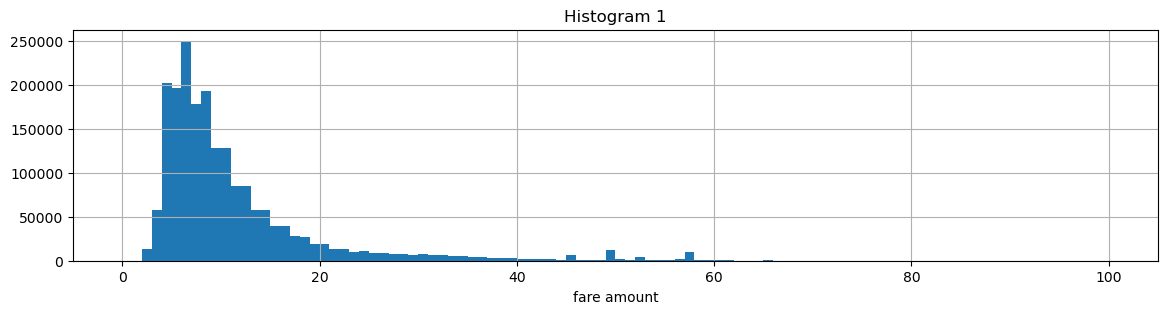

In [9]:
#histogram of fare amount
train_df[train_df.fare_amount<100].fare_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('fare amount')
plt.title('Histogram 1')

Text(0.5, 1.0, 'Histogram 2')

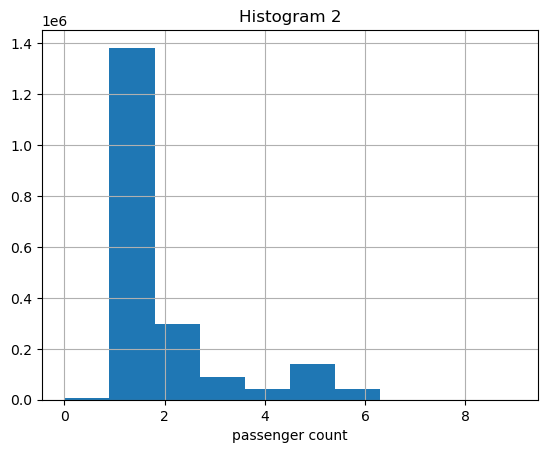

In [10]:
#histogram of passenger count
train_df[train_df.passenger_count<10].passenger_count.hist()
plt.xlabel('passenger count')
plt.title('Histogram 2')

In [11]:
#defining a function to calculate the distance given latitude and longitude of 2 places using haversine formula
def hav_dist(lat1, lon1, lat2, lon2):
    dLat = np.radians(lat2 - lat1)
    dLon = np.radians(lon2 - lon1)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    
    a = (np.sin(dLat / 2) ** 2 + np.sin(dLon / 2) ** 2 * np.cos(lat1) * np.cos(lat2))
    rad = 6371  # Earth's radius in kilometers
    c = 2 * np.arcsin(np.sqrt(a))
    
    distance = rad * c
    return distance

In [12]:
#adding a new feature distance to each row
train_df['distance'] = hav_dist(train_df['pickup_latitude'], train_df['pickup_longitude'],train_df['dropoff_latitude'], train_df['dropoff_longitude'])
test_df['distance'] = hav_dist(test_df['pickup_latitude'], test_df['pickup_longitude'],test_df['dropoff_latitude'], test_df['dropoff_longitude'])

#### Removing missing data

In [13]:
print(train_df.isnull().sum())

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    14
dropoff_latitude     14
passenger_count       0
distance             14
dtype: int64


In [14]:
#removing null values
print('old size: %d' % len(train_df))
train_df = train_df.dropna(how = 'any', axis = 'rows')
print('new size: %d' % len(train_df))

old size: 1999923
new size: 1999909


Text(0.5, 1.0, 'Histogram 3')

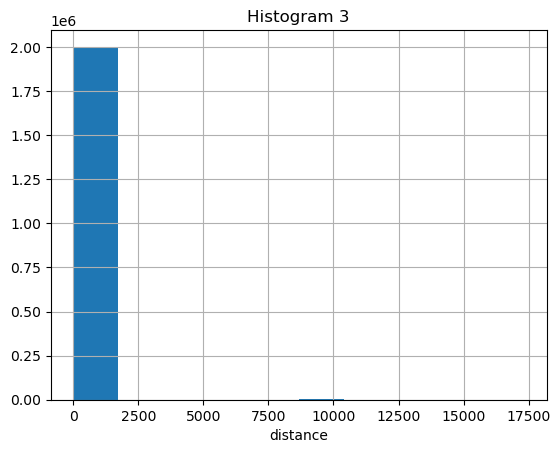

In [15]:
#histogram of distance
train_df.distance.hist()
plt.xlabel('distance')
plt.title('Histogram 3')

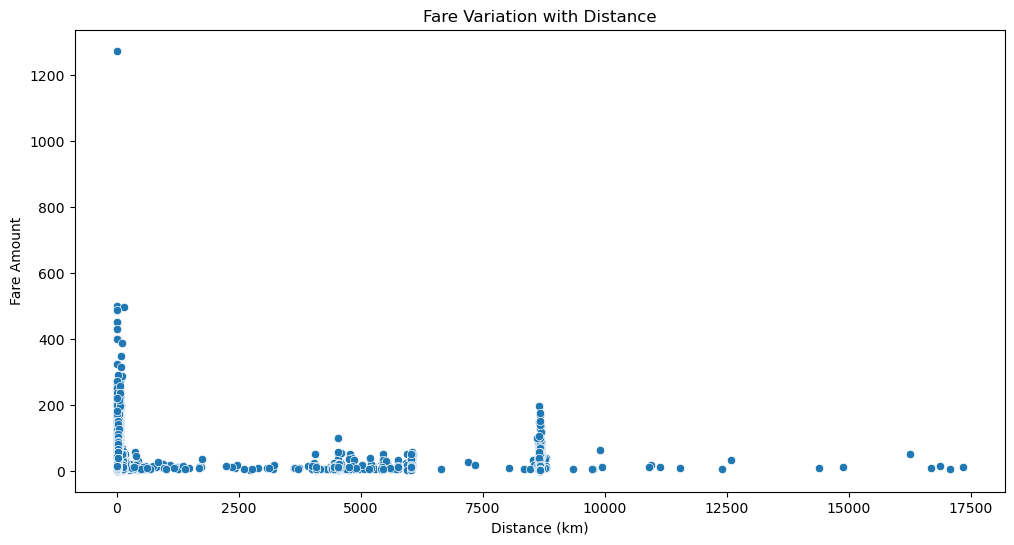

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='distance', y='fare_amount', data=train_df)
plt.title('Fare Variation with Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount')
plt.show()

In [17]:
#lets remove all data whose fare > 0 when distance = 0
print('old size: %d' % len(train_df))
remove = (train_df.fare_amount > 0) & (train_df.distance == 0)
train_df = train_df[~remove]  # Keep rows that don't match the conditions
print('new size: %d' % len(train_df))

old size: 1999909
new size: 1943101


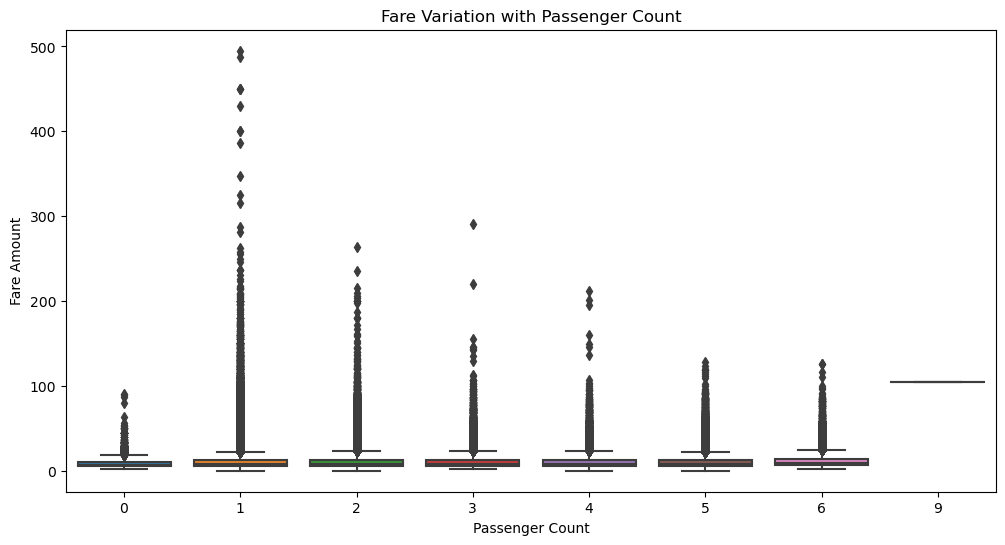

In [18]:
# Plot fare variation with passenger count
plt.figure(figsize=(12, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=train_df)
plt.title('Fare Variation with Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.show()

In [19]:
#remove all fares>0 when there are no passengers
print('old size: %d' % len(train_df))
remove = (train_df.fare_amount > 0) & (train_df.passenger_count == 0)
train_df = train_df[~remove]  # Keep rows that don't match the conditions
print('new size: %d' % len(train_df))

old size: 1943101
new size: 1936111


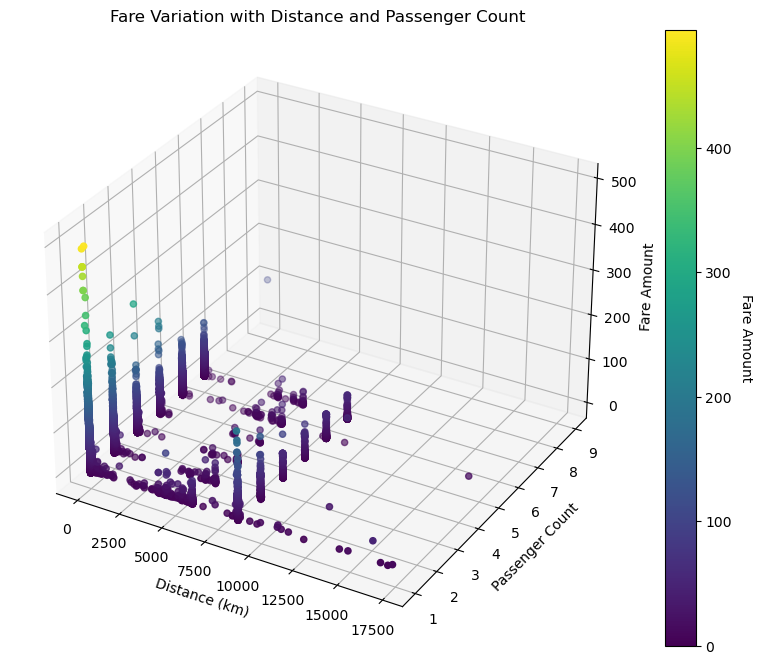

In [20]:
# Plot fare variation with distance and passenger count
# Create a figure and a 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Create a scatter plot
scatter = ax.scatter(train_df['distance'], train_df['passenger_count'],train_df['fare_amount'], c=train_df['fare_amount'], cmap='viridis')
# Set labels and title
ax.set_xlabel('Distance (km)')
ax.set_ylabel('Passenger Count')
ax.set_zlabel('Fare Amount')
ax.set_title('Fare Variation with Distance and Passenger Count')
# Add a colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Fare Amount', rotation=270, labelpad=15)
plt.ion()
plt.show()

In [21]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
count,1.936111e+06,1.936111e+06,1.936111e+06,1.936111e+06,1.936111e+06,1.936111e+06,1.936111e+06
mean,1.135201e+01,-7.384553e+01,4.065857e+01,-7.384679e+01,4.065724e+01,1.690770e+00,1.987606e+01
std,9.699419e+00,8.026088e+00,5.702472e+00,7.868479e+00,8.761838e+00,1.305572e+00,3.704783e+02
min,0.000000e+00,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,1.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399229e+01,4.073644e+01,-7.399159e+01,4.073539e+01,1.000000e+00,1.279656e+00
50%,8.500000e+00,-7.398211e+01,4.075329e+01,-7.398062e+01,4.075379e+01,1.000000e+00,2.181223e+00
75%,1.250000e+01,-7.396838e+01,4.076748e+01,-7.396538e+01,4.076838e+01,2.000000e+00,3.966646e+00
max,4.950000e+02,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,9.000000e+00,1.733020e+04


In [22]:
#picking features & target
features = ['distance','passenger_count']
target = 'fare_amount'

X = train_df[features]
y= train_df[target]

**Other parameters that could affect taxi rates:**
( from given data types )

- Time of day
- Date ( weekends & weekdays )
- Area ( some places might have fixed rates )

In [23]:
#splitting train data into train & test set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
#making a linear regression model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
#making a prediction
y_pred=model.predict(X_val)

In [26]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE on validation set: {rmse}')

RMSE on validation set: 9.712105985729462


## **Submission**

In [30]:
X_test = test_df[features]
filename = './output/predicted-fare'
y_final = model.predict(X_test)
submission = pd.DataFrame({'key': test_df.key, 'fare_amount': y_final},columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)

"""
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Root Mean Squared Error on Test Set: {test_rmse}')
"""

"\ntest_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))\nprint(f'Root Mean Squared Error on Test Set: {test_rmse}')\n"

In [31]:
submission

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.271906
1,2015-01-27 13:08:24.0000003,11.271973
2,2011-10-08 11:53:44.0000002,11.270791
3,2012-12-01 21:12:12.0000002,11.271670
4,2012-12-01 21:12:12.0000003,11.273911
...,...,...
9909,2015-05-10 12:37:51.0000002,11.755427
9910,2015-01-12 17:05:51.0000001,11.756177
9911,2015-04-19 20:44:15.0000001,11.766586
9912,2015-01-31 01:05:19.0000005,11.759495
